## Quantile Function

In probability theory and statistics, the *cumulative distribution function* (CDF) $F$ of a random variable $X$, evaluated at $x$, is the probability that $X$ will take a value less than or equal to $x$

$$F_X(x) = \mathbb{P}(X \le x)\qquad\mathrm{or equivalently}~\int_{-\infty}^{x}{f(X)dX}$$
so it gives the area under the probability density function $f$ from minus infinity to $x$.

The probability that $X$ lies in the interval $(a,b]$ is therefore

$$\mathbb{P}(a\lt X \le b)=F_{X}(b)-F_{X}(a)\qquad\mathrm{or}~\int_a^b{f(X)dX}$$

With reference to a continuous and strictly monotonic distribution function, for example the cumulative distribution function $F_X$, the *quantile function* $Q$ returns a threshold value $x$ below which random draws from the given CDF would fall $p$ percent of the time.
 
 In terms of the distribution function $F$, the quantile function $Q$ returns the value $x_p$ such that $ F_{X}(x_p):=\mathbb{P}(X\le x_p)=p$

So the quantile function does the opposite of the cumulative distribution function: given a probability $p$ (or a value of the CDF) it returns the $x$ at which the CDF reaches this probability (or this value)
$$Q=F^{-1}$$

In Fig.~\ref{fig:percentile} an example related to the Gaussian distribution is shown. On the left the Gaussian PDF is drawn, the red area represent the 30% of the total area (which is 1 since the PDF is normalized). On the right the corresponding CDF is represented, in the plot it is also highlighted the point at which the CDF reaches 30%. The corresponding quantile value is also indicated and is -0.5244.

<img src="percentile.png">

The computation of CDF and quantiles is quite simple in $\tt{python}$. Many distribution implementations are available in $\tt{scipy.stats}$ module and for each of them the methods $\tt{cdf(x)}$ and $\tt{ppf(x)}$ are available to evaulate CDF and quantile respectively.

In [20]:
from scipy.stats import norm

quantile = norm.ppf(0.3)
cdf = norm.cdf(quantile)

print ("30%-quantile of standard normal is {}".format(quantile))
print ("CDF value at {}: {}".format(quantile, cdf))

30%-quantile of standard normal is -0.5244005127080409
CDF value at -0.5244005127080409: 0.29999999999999993


If instead of a distribution you have a dataset the quantile can be determined using the function $\tt{numpy.percentile}$ (this will be useful when estimating VaR). Notice that in this case we are talking about *percentile* which is the *quantile* times 100 (e.g. 50-percentile is equivalent to 0.5-quantile). 

In [21]:
import numpy

dist = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# first argument the dataset
# second argument a list of percentiles
perc = numpy.percentile(dist, [1, 50])

print (perc)

[1.08 5.  ]


### Distribution Transformation

Distribution transformation is a very useful tool which will be extensively used with the copula concept that we discuss in the next Section.
The technique we are going to outline transforms every random variables to uniform and viceversa and is called \emph{probability integral transform}. 

Computationally, this method involves computing the quantile function of the distribution — in other words, computing the cumulative distribution function (CDF) of the distribution (which maps a number in the domain to a probability between 0 and 1) and then inverting that function. We won't go into the details but we will just show few examples of how this can be done in $\tt{python}$.

The transformation takes uniform samples of a number $u$ between 0 and 1, interpreted as a probability, and then returns the largest number $x$ from the domain of the distribution $\mathbb{P}(X)$ such that $\mathbb{P}(-\infty <X<x)\le u$. For example, imagine that $\mathbb{P}(X)$ is the standard normal distribution with mean zero and standard deviation one. The table below shows samples taken from the uniform distribution and their representation on the standard normal distribution.

Transformation from uniform sample to normal:

| $u$     | $F^{-1}(u)$ |
|:----------:|:----------------:|
| 0.5     |      0      |
|.975     | 1.95996     |
|.995     |	2.5758      |
|.999999  |	4.75342     |
|$1-2^{-52}$| 8.12589     |

Let's first sample uniformly distributed values between 0 and 1:

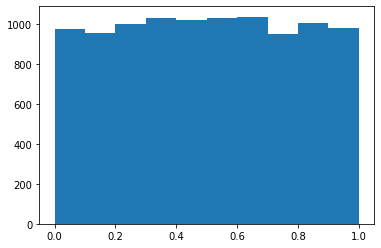

In [6]:
from scipy import stats
from matplotlib import pyplot as plt

x = stats.uniform(0, 1).rvs(10000)

plt.hist(x)
plt.show()

Next we want to transform these samples so that instead of uniform they are normally distributed. As we have seen the transform that does this is the inverse of the cumulative density function (CDF) of the normal distribution the $(\tt{ppf(x))}$.

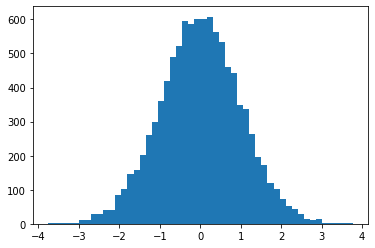

In [7]:
norm = stats.distributions.norm() 
x_trans = norm.ppf(x)

plt.hist(x_trans, bins=50)
plt.show()

If we plot them togheter in a 2D plot we can get a sense of what is going on using the inverse CDF transformation:

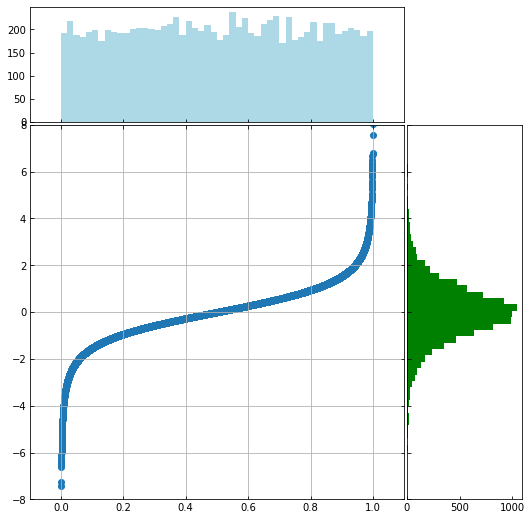

In [18]:
import numpy as np

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, x_trans)
ax_scatter.grid(True)

ax_scatter.set_xlim((-0.1, 1.1))
ax_scatter.set_ylim((-8, 8))

ax_histx.hist(x, bins=50, color="lightblue")
ax_histy.hist(x_trans, bins=100, orientation='horizontal', 
              color="green")

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

The inverse CDF stretches the outer regions of the uniform to yield a normal distribution. The nice thing of the technique is that it can be done for any arbitrary (univariate) probability distributions, like for example \href{https://en.wikipedia.org/wiki/Student%27s_t-distribution}{t-Student} or \href{https://en.wikipedia.org/wiki/Gumbel_distribution}{Gumbel}:

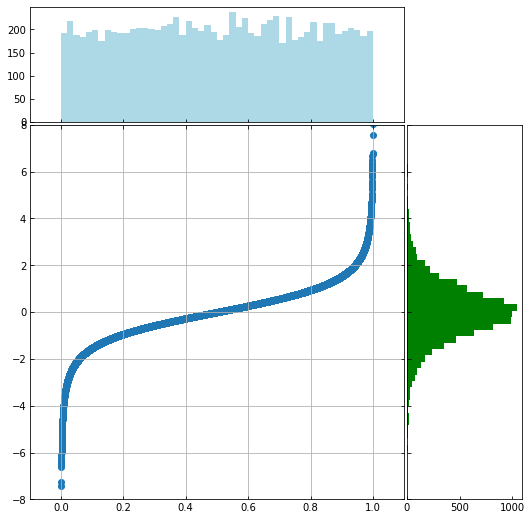

In [19]:
tstudent = stats.distributions.t(4)
x_trans = tstudent.ppf(x)

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, x_trans)
ax_scatter.grid(True)

ax_scatter.set_xlim((-0.1, 1.1))
ax_scatter.set_ylim((-8, 8))

ax_histx.hist(x, bins=50, color="lightblue")
ax_histy.hist(x_trans, bins=100, orientation='horizontal',
             color="green")

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

Clearly to do the opposite transformation from an arbitray distribution to the uniform(0, 1) we can just apply the inverse of the inverse CDF, the CDF itself...

## Copula

In probability theory a *copula* $C(U_1, U_2, \ldots, U_n, \rho)$ is a multivariate (multidimensional) cumulative distribution function for which the marginal probability distribution (the probability distribution of each dimension) of each variable is uniform on the interval $[0, 1]$ ($U_i \approx$~Uniform(0,1)). $\rho$ represent the correlation between each variable. 

*Sklar's theorem* states that any multivariate joint distribution can be written in terms of univariate marginal distribution functions and a copula which describes the dependence structure between the variables.

Copulas are used to describe the dependence between random variables and have been used widely in quantitative finance to model and minimize tail risk and portfolio-optimization applications.
Copulas are popular since they allow one to easily model and estimate the distribution of random vectors by estimating marginals and copulae separately.

Despite the obscure and daunting definition the conceptof copula is quite simple so let's try to clarify it a bit with a practical example. Later we will see what role copulas played in the 2008 financial crisis.

### Example Problem Case
Imagine we measure two variables that are non-normally distributed and correlated. For example, we look at various rivers and for every river we look at the maximum water level of that river over a certain time-period. In addition, we also count how many months each river caused flooding. 

For the probability distribution of the maximum level of the river we know that maximums are Gumbel distributed, while the number of flooding can be modelled according to a \href{https://en.wikipedia.org/wiki/Beta_distribution}{\emph{Beta}} distribution.

Clearly it is pretty reasonable to assume that the maximum level and the number of floodings is going to be correlated, however we don't know how we could model that correlated probability distribution. Above we only specified the distributions for individual variables, irrespective of the other one (i.e. the marginals), in reality we are dealing with a joint distribution of both of these together. 

And here is where copulas come to our rescue.

Copulas essentially allow to decompose a joint probability distribution into their marginals (which by definition have no correlation) and a function which couples (hence the name) them together and thus allows us to specify the correlation separately. The copula is that coupling function.

## Adding Correlation with Gaussian Copulas

How does this help us with our problem of creating a custom joint probability distriution ? 

We are actually almost done already, we saw before how to convert anything uniformly distributed to an arbitrary probability distribution. So that means we need to generate uniformly distributed data with the correlation we want and then transform the marginals into the desired distributions. 

How do we do that ? 

* simulate from a multivariarte Gaussian with the specific corrrelation structure;
* transform so that the marginals are uniform
* finally transform the uniform marginals to whatever we like.

So let's sample from a multivariate normal (2D) with a 0.5 correlation.

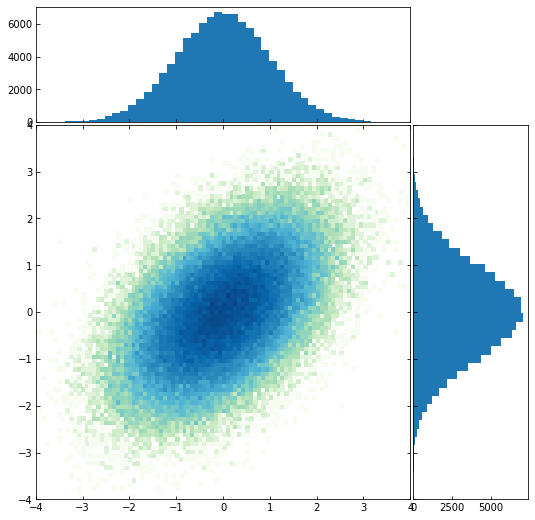

In [22]:
# this import is for plotting
from matplotlib import colors

mvnorm = stats.multivariate_normal(mean=[0, 0] , cov=[[1, 0.5],
                                                      [0.5, 1]])
x = mvnorm.rvs(100000)

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.hist2d(x[:, 0], x[:, 1], bins=100, norm=colors.LogNorm(), cmap="GnBu")

ax_scatter.set_xlim((-4, 4))
ax_scatter.set_ylim((-4, 4))

ax_histx.hist(x[:, 0], bins=50)
ax_histy.hist(x[:, 1], bins=50, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

Now use what we have just seen to *uniformify* the marginals using the $\tt{cdf}$ function of the normal distribution ($x$ is a 2D vector, but in the code we can treat it as a vector, $\tt{cdf}$ will be applied separately on each component):

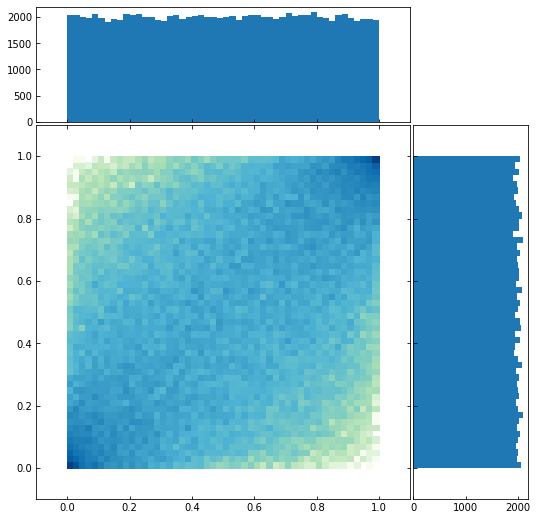

In [23]:
norm = stats.norm()
x_unif = norm.cdf(x)

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.hist2d(x_unif[:, 0], x_unif[:, 1], bins=50, norm=colors.LogNorm(), cmap="GnBu")
ax_scatter.grid(True)
ax_scatter.set_xlim((-0.1, 1.1))
ax_scatter.set_ylim((-0.1, 1.1))

ax_histx.hist(x_unif[:, 0], bins=50)
ax_histy.hist(x_unif[:, 1], bins=50, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

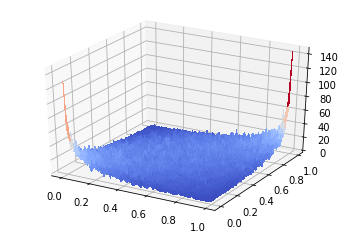

In [25]:
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal, norm
import numpy as np

mvnorm = multivariate_normal(mean=[0, 0] , cov=[[1, 0.5], 
                                            [0.5, 1]])
x = mvnorm.rvs(100000)
normal = norm()
x_unif = normal.cdf(x)

#plt.contour(x_unif[:, 0], x_unif[:, 1], 
#           bins=50)

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
XBIN = np.array([i/100 for i in range(0, 101)])
X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(X, Y)
h, XBIN, XBIN= np.histogram2d(x_unif[:, 0], x_unif[:, 1], bins=(XBIN, XBIN))

# Plot the surface.
surf = ax.plot_surface(X, Y, h, cmap=cm.coolwarm,
                 linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

These plots above is usually how copulas are visualized.
Finally we can just transform the marginals again from uniform to what we want (i.e. Gumbel and Beta in our river example): 

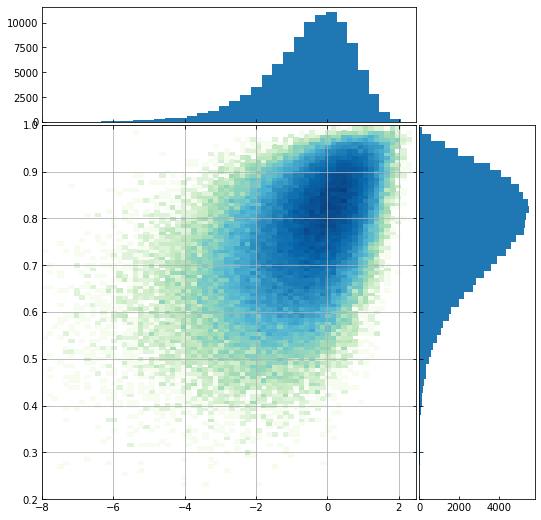

In [28]:
m1 = stats.gumbel_l()
m2 = stats.beta(a=10, b=3)

# transform U1 into Gumbel
x1_trans = m1.ppf(x_unif[:, 0])
#transform U2 into Beta
x2_trans = m2.ppf(x_unif[:, 1])

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.hist2d(x1_trans, x2_trans, bins=100, norm=colors.LogNorm(), cmap="GnBu")
ax_scatter.grid(True)
ax_scatter.set_xlim((-8, 2.5))
ax_scatter.set_ylim((0.2, 1))

ax_histx.hist(x1_trans, bins=50)
ax_histy.hist(x2_trans, bins=50, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

To see that it is actually working as expected we should now compare our scatter plot with correlation to the joint distribution of the same marginals without correlation:

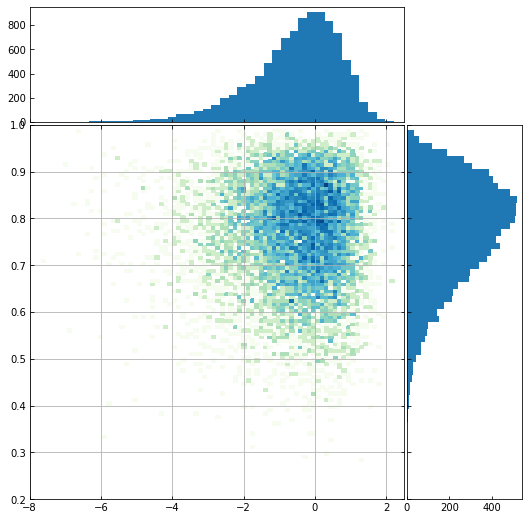

In [29]:
# sample from Gumbel
x1 = m1.rvs(10000)
# sample from Beta
x2 = m2.rvs(10000)

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.hist2d(x1, x2, bins=100, norm=colors.LogNorm(), cmap="GnBu")
ax_scatter.grid(True)
ax_scatter.set_xlim((-8, 2.5))
ax_scatter.set_ylim((0.2, 1))

ax_histx.hist(x1, bins=50)
ax_histy.hist(x2, bins=50, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

Using the uniform distribution as a common base for our transformations we can easily introduce correlations and flexibly construct complex probability distributions. Clearly this is directly extendeable to higher dimensional distributions as well.

### Generate Correlated Distributions
If we need to generate numbers from correlated distribution we can follow the same steps as before:

* generate a random vector $\mathbf{x}=(x_1, x_2,\ldots)$ from the original multivariate distribution;
* determine the single $U_i(x_i)$ by applying $\tt{cdf}$ to each $x_i$;
* transform again each $U_i(x_i)$ to the desired marginal distributions using $\tt{ppf}$;
* each component of the vector $\mathbf{x}$ will be converted to a set of random numbers drawn from the desired distributions, with the appropriate correlation.

## Application to Finance
In credit derivative valuation and credit risk management, one of the most important issue is the estimate of default probabilities and their correlations. For this, generally speaking, there are two ways: using historical default data or using mathematical models, like copulas. 

Historical default data has played an important role in the estimation of default probabilities. However, because default events are rare, there is very limited default data available. Moreover, historical data reflects the historical default pattern only and it may not be a proper indicator of the future. This makes the estimation of default probabilities from historical data difficult and inexact. To use this same data to estimate default correlations is even more difficult and more inexact. 

On the other hand mathematical models don't rely on historical default data. In Chapter~\ref{} we have seen how it is possible to derive default probabilities from market data. Before going into the details of the application of the copula to default probabilities let's introduce two more kind of contracts.

## Basket Default Swaps
A basket default swap is a credit derivative on a portfolio of reference entities. The
simplest basket default swaps are first-to-default swaps, second-to-default swaps,
and nth-to-default swaps.

With respect to a basket of reference entities, a first-to-default swap provides insurance for only the first default, a second-to-default swap
provides insurance for only the second default, an nth-to-default swap provides
insurance for only the nth default. 

For example, in an nth-to-default swap, the protection seller does not make a payment to the protection buyer for the first n−1 defaulted reference entities, and makes the payment only for the nth defaulted reference entity. Once there is a payment upopn the default of the a defaulted reference entity, the swap terminates. 

### Basket CDS Valuation
Consider a first-to-default basket. If the 1st-to-default probabilities are known, then the default probability of a basket of entities is simply the sum of the 1s-to-default probabilities of the individual entities in the basket. From this one can easily calculate the fair value of the premium payments of a basket default swap: if the protection is only for the first entity in the basket only the payoff value of the 1st defaulted entity needs to be calculated. 
For an nth-to-default swap similar arguments also hold. 

The valuation of a basket default swap then comes down to the calculation of relevant default probabilities. 

### Calculating nth-to-default Probabilities

#### Independent Defaults
If the default times of the names of a basket are independent, first-to-default, nth-to-default, all-to-default probabilities can be calculated through multiplication and integration of the default probability curves of each basket components. 

As an example, we consider the second-to-default probability of a 3-name basket. Let $\tau_i$ be the default time of name $i$ and $F_i(t)$ its distribution. Then the probability that name 1 defaults second in the basket before time $t$: 

$$P((\tau_2\lt\tau_1)\cap (\tau_1\lt t)\cap (\tau_1\lt\tau_3)) +
P((\tau_3\lt\tau_1)\cap (\tau_1\lt t)\cap (\tau_1\lt\tau_2)) =
\int_0^t{F_2 (s)\cdot (1-F_3 (s))~dF_1(s)} +  \int_0^t{F_3 (s)\cdot (1-F_2 (s))~dF_1(s)}$$

The formula for nth-to-default probability in a general basket can be derived similarly, however, complexity increases as the number of names increases.

Suppose the default probabilities of three companies, A, B and C are given as in the following table:

|time in years | A | B | C |
| :-:|:-:|:-:|:-:|
|0 | 0 | 0 | 0 |
|1 | 0.022032 | 0.0317 | 0.035 |
|2 | 0.046242 | 0.0655 | 0.075 |
|3 | 0.07266 | 0.1022 | 0.121 |
|4 | 0.101233 | 0.142 | 0.153 |
|5 | 0.131885 | 0.1752 | 0.205 |

and suppose that the default events of the three companies are independent. 

The default probabilities are linear in each time interval so the integral above can be solved by substitution:

$$ \int_{x_0}^{x_1}{(1-F_B(x))(1-F_C(x))dF_A(x)}$$

Setting $t=m_A x + q_A$ it becomes with $m_A, q_A$ are the parameters of the line joining the default probabilities of company A:

$$ \int_{m_A x_0 + q_A}^{m_A x_1 + q_A}{(1-F_B(x(t)))(1-F_C(x(t)))dt}\qquad\textrm{, with}~x(t) = \cfrac{t -q_A}{m_A} $$
and similarly for company B and C.

To convert it into python we can use $\tt{scipy.integrate.quad}$ to perform the integral and $\tt{numpy.interp}$ to determine the intermediate default probabilities.

In [30]:
from scipy.integrate import quad
from numpy import interp

default_rates = {"A":(0, 0.022032, 0.046242, 0.07266, 0.101233, 0.131885), # company A
                 "B":(0, 0.0317, 0.0655, 0.1022, 0.142, 0.1752), # company B
                 "C":(0, 0.035, 0.075, 0.121, 0.153, 0.205)} # company C

def func(x, default, companies, t):
    m = default[companies[0]][t] - default[companies[0]][t-1]
    q = default[companies[0]][t-1] - m * (t-1)
    t = (x-q)/m
    F2 = 1 - interp(t, range(len(default[companies[1]])), default[companies[1]])
    F3 = 1 - interp(t, range(len(default[companies[2]])), default[companies[2]])
    return F2*F3

def integral(default, companies, t):
    return quad(func, 0, default[companies[0]][t], args=(default, companies, t))[0]
                 
for companies in [("A", "B", "C"), ("B", "A", "C"), ("C", "A", "B")]:
    prob = 0
    for t in range(1, 6):
        prob = integral(default_rates, companies, t)
        print ("First to default prob at time ({}) for company {}: {:.5f}".format(t, companies[0], prob))


First to default prob at time (1) for company A: 0.02131
First to default prob at time (2) for company A: 0.04301
First to default prob at time (3) for company A: 0.06460
First to default prob at time (4) for company A: 0.08573
First to default prob at time (5) for company A: 0.10606
First to default prob at time (1) for company B: 0.03080
First to default prob at time (2) for company B: 0.06160
First to default prob at time (3) for company B: 0.09245
First to default prob at time (4) for company B: 0.12315
First to default prob at time (5) for company B: 0.15018
First to default prob at time (1) for company C: 0.03407
First to default prob at time (2) for company C: 0.07071
First to default prob at time (3) for company C: 0.10986
First to default prob at time (4) for company C: 0.13879
First to default prob at time (5) for company C: 0.17011


#### Correlated Defaults
When the default probabilities of the companies are correlated the copula approach can be used. 

Suppose we would like to simulate the defaults for the next 5 years for 10 companies. The copula default correlation between each company is 0.2 and the cumulative probability of default during the next 1,2,3,4 5 years is 1%, 3%, 6%, 10%, 13% respectively for each company.

When a Gaussian copula is used in order to simulate the defaults we need to sample from a multivariate normal distribution a vector $\mathbf{x}$, transform then each $x_i$ into the default time $t_i$.

In [37]:
from scipy.stats import multivariate_normal, norm
import numpy

numpy.random.seed(1)

mvnorm = multivariate_normal(mean=[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.], 
                             cov=[[1.0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2],
                                  [0.2,1.0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2], 
                                  [0.2,0.2,1.0,0.2,0.2,0.2,0.2,0.2,0.2,0.2], 
                                  [0.2,0.2,0.2,1.0,0.2,0.2,0.2,0.2,0.2,0.2], 
                                  [0.2,0.2,0.2,0.2,1.0,0.2,0.2,0.2,0.2,0.2], 
                                  [0.2,0.2,0.2,0.2,0.2,1.0,0.2,0.2,0.2,0.2], 
                                  [0.2,0.2,0.2,0.2,0.2,0.2,1.0,0.2,0.2,0.2], 
                                  [0.2,0.2,0.2,0.2,0.2,0.2,0.2,1.0,0.2,0.2], 
                                  [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,1.0,0.2], 
                                  [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,1.0]])
x = mvnorm.rvs(1)
x_unif = norm.cdf(x)
print (x_unif)

[0.45018259 0.51775381 0.20822031 0.10799771 0.41681102 0.35421988
 0.67784311 0.04185095 0.03395425 0.00265879]


In this simple example company 10 would have defaulted during first year ($\mathbb{P}(t_{10}) \le 1\%$, companies 8 and 9 during the second (both have $3\% \le \mathbb{P}(t_{8,9}) \le 6\%$) and so on.

To determine nth-to-default probabilities it is enough to repeat many sampling from the multivariate normal distributions and count how many times we have n defaults before each year.

### Collateralized Debt Obligation
A collateralized debt obligation (CDO) is a security backed by a diversified pool of
one or more kinds of debt obligations such as bonds, loans, credit default swaps or
structured products (mortgage-backed securities, asset-backed securities, and even
other CDOs). A CDO can be initiated by one or more of the following: banks,
nonbank financial institutions, and asset management companies, is referred to as
the sponsor. The sponsor of a CDO creates a company so-called the special purpose
vehicle (SPV). The SPV works as an independent entity. In this way, CDO investors
are isolated from the credit risk of the sponsor. Moreover, the SPV is responsible
for the administration. The SPV obtains the credit risk exposure by purchasing
debt obligations (bonds or residential and commercial loans) or selling CDSs; it
transfers the credit risk by issuing debt obligations (tranches/credit-linked notes).
The investors in the tranches of a CDO have the ultimate credit risk exposure to
the underlying reference entities.
The SPV issues four kinds of tranches. Each tranche has
an attachment percentage and a detachment percentage. When the cumulative
percentage loss of the portfolio reaches the attachment percentage, investors
in the tranche start to lose their principal, and when the cumulative percentage loss
of principal reaches the detachment percentage, the investors in the tranche lose all
their principal and no further loss can occur to them.

In the literature, tranches of a CDO are classified as subordinate/equity tranche,
mezzanine tranches, and senior tranches according to their subordinate levels. 
Because the equity tranche is extremely
risky, the sponsor of a CDO holds the equity tranche and the SPV sells other tranches
to investors.

### Role of Correlation in Basket CDS and CDO
THe cost of protection in a nth-to-default CDS or a trancehe of a CDO is critically dependent on default correlation. Suppose that a basket of a 1000 reference entities is used to define a 5-year nth-to-default CDS and that each reference entity has a probability of 2% of defaulting during the 5 years. When the default corralation between the reference entities is zero the binomial distribution (see Appendix~\ref{appendix1}) shows that the probability of one or more defaults during the 5 years is 86.7% and the probability of 10 or more defaults is 0.00034%. A first-to-default CDS is therefore quite valuable wereas a 10th-to-default CDS is worth almost nothing.

In [50]:
from scipy.stats import binom

b = binom(100, 0.02)
print ("P(x>=1) : {:.4f}".format(b.cdf(100)-b.cdf(0)))
print ("P(x>=10): {:.6f}".format(b.cdf(100)-b.cdf(9)))

P(x>=1) : 0.8674
P(x>=10): 0.000034


As the default correlation increases the probability of one or more defaults declines and the probability of 10 or more defaults increases. In the limit where the default correlation between the reference entities is perfect the probability of one or more defaults equals the probability of ten or more defaults and is 2%. This is because in this extreme situation the reference entities are essentially the same: either they all default (with probability 2%) or none of them default (with probability 98%).

### Standard Market Model
The critical input into pricing CDO tranches or Basket CDS is an estimate of the default dependence (default correlation) between the underlying assets. Semianalyticy !!!
One popular method for estimating the dependence structure is using copula functions, a method first applied in actuarial science. While there are several types of copula function models, the first introduced was the one-factor Gaussian copula model.

Suppose that a CDO includes $n$ assets $i = 1, 2,\ldots, n$ and the default times $\tau_i$ of the $i$th asset has a default intensity $\lambda_i$. Then the probability of a default occurring before the time $t$ is

$$\mathbb{P}(\tau_i \lt t) = 1 - \mathrm{exp}(-\lambda_i t)$$
see Chapter~\ref{hazard}.

In a one-factor copula model, it is assumed that the default time $\tau_i$ for the $i$th
company is related to a random variable $X_i$ with a zero mean and a unit variance.
For any given time $t$, there is a corresponding value $x$ such that

$$\mathbb{P}(X_i < x) = \mathbb{P}(\tau_i < t),\qquad i = 1, 2,\ldots, n$$

Moreover, the one-factor copula model assumes that each random variable $X_i$ is the
sum of two components

$$X_i = a_i M + \sqrt{1-a_i^2 Z_i},\qquad i = 1, 2,\ldots, n$$

where $Z_i$ is the idiosyncratic component of company $i$, and $M$ is the common component of the market. It is assumed that the $M$ and $Z_i$ are mutually independent random variables, for simplicity also that the random variables $M$ and $Z_i$ are identical. The factor $a_i$ satisfies $-1 \le a_i \le 1$. The default correlation
between $X_i$ and $X_j$ is $a_i a_j,(i \ne j)$.

Let $F$ denote the cumulative distribution of the $Z_i$ and $G$ denote the cumulative distribution of the $X_i$. Then given the market condition $M = m$, we have

$$\mathbb{P}(Z_i < x|M = m) = F\left(\cfrac{x-a_i m}{\sqrt{1-a_i^2}}\right)$$
and the conditional default probability is

$$\mathbb{P}(\tau_i < t|M = m) = D_{t_i |m} = F\left\{\cfrac{G^{-1}[\mathbb{P}(\tau_i < t)] - a_i m}{\sqrt{1-a_i^2}}\right\}$$

For simplicity, the following two assumptions are made:

* all the companies have the same default intensity, i.e, $\lambda_i = \lambda$;
* the pairwise default correlations are the same, i.e $a_i = a$.

The second assumption means that the contribution of the market component is
the same for all the companies and the correlation between any two companies is
constant, $\rho = a^2$.

Under these assumptions, given the market situation $M = m$, all the companies
have the same cumulative default probability $D_{t|m}$. Moreover, for a
given value of the market component $M$, the defaults are mutually independent for
all the underlying companies. Letting $N_{t|m}$ be the total defaults that have occurred
by time $t$ conditional on the market condition $M = m$, then $N_{t|m}$ follows a binomial
distribution, and

$$\mathbb{P}(N_{t|m} = j) = \cfrac{n!}{j!(n-j)!}D^j_{t|m}(1-D_{t|m})^{n-j},\qquad  j=0, 1, 2,\ldots,n$$
The probability that there will be exactly $j$ defaults by time $t$ is

$$\mathbb{P}(N_{t} = j) = \int_{-\infty}^{\infty}{\mathbb{P}(N_{t|m} = j)f_M(m)dm}$$

where $f_M(m)$ is the probability density function (PDF) of the random variable $M$.

Li (1999, 2000) was the first to suggest that the Gaussian copula could be employed
in credit risk modeling to estimate the correlation default. In a one-factor Gaussian
copula model, the distributions of the common market component $M$ and the individual component $Z_i$ are standard normal Gaussian distributions.
Because the sum of two independent Gaussian distributions is still a Gaussian distribution, the $X_i$ have a standard normal distribution.
The one-factor copula Gaussian copula model under the assumptions outlined above is the *market standard model*.

### Valuation of CDO
Suppose that the payment date on a CDO tranche are at times $\tau_i$. Define $\mathbb{E}_j$ the expected 
tranche principal at time $\tau$ and $D(\tau)$ the discount factor at time $\tau$. Suppose also that the spread
on a particular tranche (i.e. the number of basis point paid for protection on the remaining tranche principal) is $s$. 

The present value of the expected regular spread payments on the CDO is given by
\begin{equation}
s\cdot A = s\cdot \sum_{j=1}^{m}(\tau_j - \tau_{j-1})\mathbb{E}_{j}D(\tau_j)
\label{eq:A}
\end{equation}
The expected loss between times $\tau_{j-1}$ and $\tau_j$ is $\mathbb{E}_{j-1}-\mathbb{E}_j$. For simplicity assume
the loss occurs only at the midpoint of the time interval, so the present value of the expected payoffs on the CDO tranche is
\begin{equation}
C=\sum_{j=1}^{m}(\mathbb{E}_{j-1}-\mathbb{E}_j)D\left(\frac{\tau_{j-1}+\tau_j}{2}\right)
\label{eq:C}
\end{equation}
The accrual payment due on the losses is finally given by
\begin{equation}
s\cdot B = s\cdot\sum_{j=1}^{m}\frac{1}{2}(\tau_j - \tau_{j-1})(\mathbb{E}_{j-1}-\mathbb{E}_j)D(\frac{\tau_{j-1}+\tau_j}{2})
\label{eq:B}
\end{equation}

The value of the tranche, valued from the point of view of the protection buyer is $C-sA-sB$. The breakeven spread 
on the tranche occurs when the present value of the payments equals the present value of the payoffs so

$$ s = \cfrac{C}{A+B}$$

Suppose that the tranche under consideration covers losses on the portfolio between $\alpha_L$ and $\alpha_H$ and define

$$n_L = \cfrac{\alpha_L n}{1-R}\qquad \mathrm{and}\qquad n_H = \cfrac{\alpha_H n}{1-R}$$
where $R$ is the recovery rate. Finally define $m(x)$ as the smallest integer greater than $x$.
By definition the tranche principal stays $N$ while the number of defaults $k$ is less than $m(n_L)$, it is zero when the number of default is greater or equal to $m(n_H)$, otherwise is

$$\cfrac{\alpha_H -k(1-R)/n}{\alpha_H - \alpha_L}$$

The expected tranche principal at time $\tau_j$ conditional of the value of the factor $M$ is
$$\begin{equation}
\mathbb{E}_j(M) = \sum_{k=0}^{m(n_L)-1}\mathbb{P}(k, \tau_j|M) + \sum_{k=m(n_L)}^{m(n_H)-1}\mathbb{P}(k, \tau_j|M) \cfrac{\alpha_H -k(1-R)/n}{\alpha_H - \alpha_L}
\label{eq:E}
\end{equation}
$$

To compute the breakeven spread it is necessary to substitute Eq.~\ref{eq:E} into Eq.~\ref{eq:A},~\ref{eq:B} and~\ref{eq:C}
and we need to integrate the result over the variable $M$ (remember that has a standard normal distribution). 
The integration is quite complicated and is best accomplished with a technique called *Gaussian quadrature* which exploits the approximation

$$\int_{-\infty}^{\infty}{\cfrac{1}{\sqrt{2}}e^{-M^{2}/2}g(M)dM} \approx \sum_{k=1}^{k=L}w_k g(F_k)$$
as $L$ increases, accuracy increases.


## Complex Correlation Structures and the Financial Crisis

In the example above we have used the multivariate normal which gave rise to the Gaussian copula.However, we can use other and more complex copulas as well. For example we might want to assume the correlation is non-symmetruc which is useful in quant finance where correlations become very strong during market crashes and returns very negative.

Infact, Gaussian copulas are said to have played a key role in the 2008 financial crisis as tail-correlations were severely underestimated. Consider a set of mortgages in CDOs (a particular kind of contract that we are going to see) they are clearly correlated, if one mortgage fails, the likelihood that another failing is increased. In the early 2000s, the banks only knew how to model the marginals of the default rates. An (in)famous paper by Li then suggested to use copulas to model the correlations between those marginals. Rating agencies relied on thid model so heaviy, severely underestimating risk and giving false ratings...

If you are interested in the argument read \href{http://timmurphy.org/2009/07/22/line-spacing-in-latex-documents/}{this paper} for an excellent description of Gaussian copulas and the Financial Crisis which argues that different copula choices would not have made a difference but instead the assumed correlation was way too low.